In [1]:
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.optimizers import Adam
from keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_directory='input/train'
test_directory='input/test'
val_directory='input/valid'

In [3]:
base_model = Xception(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top = False
)

for layer in base_model.layers:
    layer.trainable = False

In [4]:
folders = glob('input' + '/train/*')
len(folders)

45

In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [6]:
opt = Adam(learning_rate=0.001, decay=1e-5)

model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7285 images belonging to 45 classes.
Found 225 images belonging to 45 classes.


In [8]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/7
228/228 [==============================] - 82s 318ms/step - loss: 0.6375 - accuracy: 0.8199 - val_loss: 0.1402 - val_accuracy: 0.9422
Epoch 2/7
228/228 [==============================] - 69s 302ms/step - loss: 0.2628 - accuracy: 0.9164 - val_loss: 0.1744 - val_accuracy: 0.9467
Epoch 3/7
228/228 [==============================] - 73s 317ms/step - loss: 0.1813 - accuracy: 0.9422 - val_loss: 0.0874 - val_accuracy: 0.9733
Epoch 4/7
228/228 [==============================] - 71s 309ms/step - loss: 0.1530 - accuracy: 0.9480 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 5/7
228/228 [==============================] - 74s 322ms/step - loss: 0.1186 - accuracy: 0.9628 - val_loss: 0.0761 - val_accuracy: 0.9778
Epoch 6/7
228/228 [==============================] - 72s 317ms/step - loss: 0.1366 - accuracy: 0.9535 - val_loss: 0.0551 - val_accuracy: 0.9822
Epoch 7/7
228/228 [==============================] - 73s 318ms/step - loss: 0.1056 - accuracy: 0.9631 - val_loss: 0.0611 - val_accuracy:

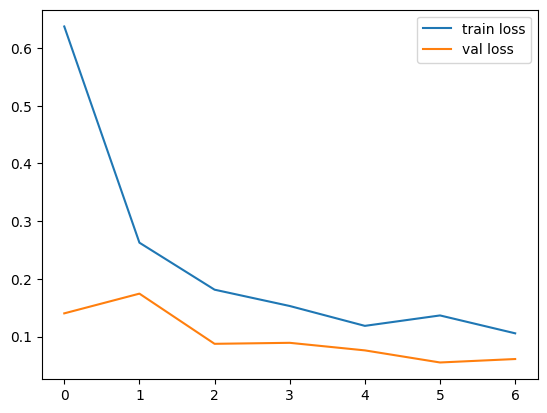

In [9]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

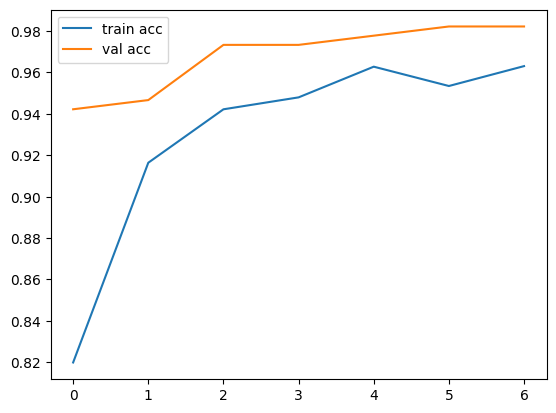

In [10]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [11]:
model.save('D:\CUET\L3_T2\CSE-300_SDP\Bird_classification/xception.h5')